In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [4]:
import json
import os
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [5]:
os.listdir()

['.ipynb_checkpoints',
 'hate-and-offensive',
 'Hate_and_Offensive.ipynb',
 'online-hate']

In [ ]:
# !wget --no-check-certificate \
#     https://github.com/t-davidson/hate-speech-and-offensive-language/blob/master/data/labeled_data.csv \
#     -O /tmp/hate-and-offensive.csv


--2022-06-17 04:14:22--  https://github.com/t-davidson/hate-speech-and-offensive-language/blob/master/data/labeled_data.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/tmp/hate-and-offensive.csv’

/tmp/hate-and-offen     [ <=>                ] 132.63K  --.-KB/s    in 0.007s  

2022-06-17 04:14:22 (19.4 MB/s) - ‘/tmp/hate-and-offensive.csv’ saved [135809]



In [6]:
data = pd.read_csv(os.path.join('hate-and-offensive','data','labeled_data.csv'))  

sentences = data['tweet'].tolist()
labels = data['class'].tolist()

# for item in data:

    # sentences.append(item['tweet'])
    # labels.append(item['class'])

In [9]:
data2 = pd.read_csv(os.path.join('online-hate','data','gab.csv'))  

data2

# sentences2 = data['tweet'].tolist()
# labels2 = data['class'].tolist()


,id,text,hate_speech_idx,response
0,1. 39869714\n,1. i joined gab to remind myself how retarded ...,[1],"[""Using words that insult one group while defe..."
1,1. 39845588\n2. \t39848775\n3. \t\t39911017\n,1. This is what the left is really scared of. ...,[3],['You can disagree with someones opinion witho...
2,1. 37485560\n2. \t37528625\n,1. It makes you an asshole.\n2. \tGive it to a...,[2],['Your argument is more rational if you leave ...
3,1. 39787626\n2. \t39794481\n,1. So they manage to provide a whole lot of da...,[2],"[""You shouldn't generalize a specific group or..."
4,1. 37957930\n2. \t39953348\n3. \t\t39965219\n,"1. Hi there, i,m Keith, i hope you are doing w...",[3],['If someone is rude it is better to ignore th...
...,...,...,...,...
11820,1. 37556347\n2. \t37556710\n,1. Remember this 3 months ago? The intern that...,[2],['Using words that profanely refer to parts of...
11821,1. 38624662\n2. \t38624840\n,1. #Sweden's four major dailies aftonbladet.se...,[2],"['Hey there, derogatory comments are not produ..."
11822,1. 38361617\n2. \t38421472\n3. \t\t38422734\n,1. Satisfaction and justice\n2. \tBEST TRUMP I...,[3],['Using words that negatively describes someon...
11823,1. 38710847\n2. \t38711592\n3. \t\t38718122\n,1. Twitter BANNED me and reported me to the FB...,"[2, 3]","[""I don't think using words that are sexist in..."


In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
training_labels_onehot = np.zeros((training_labels.size, training_labels.max()+1))
training_labels_onehot[np.arange(training_labels.size),training_labels] = 1

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
testing_labels_onehot = np.zeros((testing_labels.size, testing_labels.max()+1))
testing_labels_onehot[np.arange(testing_labels.size),testing_labels] = 1

In [ ]:
testing_labels_onehot


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid'),
    tf.keras.layers.Softmax()
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dense_7 (Dense)             (None, 3)                 75        
                                                                 
 softmax (Softmax)           (None, 3)                 0         
                                                                 
Total params: 160,483
Trainable params: 160,483
Non-trainable params: 0
________________________________________________

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels_onehot, epochs=num_epochs, validation_data=(testing_padded, testing_labels_onehot), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.8305 - accuracy: 0.7695 - val_loss: 0.7573 - val_accuracy: 0.7947 - 2s/epoch - 4ms/step
Epoch 2/30
625/625 - 2s - loss: 0.7822 - accuracy: 0.7695 - val_loss: 0.7569 - val_accuracy: 0.7947 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.7820 - accuracy: 0.7695 - val_loss: 0.7568 - val_accuracy: 0.7947 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.7820 - accuracy: 0.7695 - val_loss: 0.7568 - val_accuracy: 0.7947 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.7820 - accuracy: 0.7695 - val_loss: 0.7568 - val_accuracy: 0.7947 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.7820 - accuracy: 0.7695 - val_loss: 0.7568 - val_accuracy: 0.7947 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.7819 - accuracy: 0.7695 - val_loss: 0.7565 - val_accuracy: 0.7947 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.7457 - accuracy: 0.7982 - val_loss: 0.6873 - val_accuracy: 0.8610 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

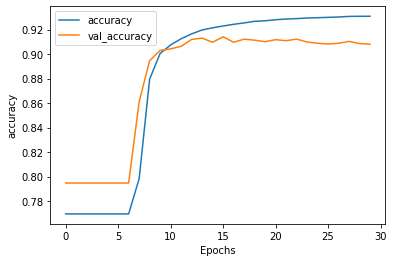

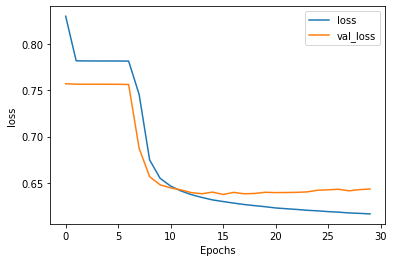

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

rt <OOV> as a woman you shouldn't complain about cleaning up your house amp as a man you should always take the trash out ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
1


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "you should go kill yourself"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.21195394 0.5760921  0.21195391]
 [0.22371481 0.5525428  0.22374232]]
